In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg_train = ImageDataGenerator(rescale=1./255,
                         #rotation_range=20,
                         #width_shift_range=.15,
                         #height_shift_range=.15,
                         #horizontal_flip=True,
                         #zoom_range=[0,0.2]
                        )
idg_validation_test = ImageDataGenerator(rescale=1./255)
path ='dataset/'
batch_size = 32 
img_size = (1200,1200)

train_dir = path + 'train'
train_images = idg_train.flow_from_directory(batch_size=batch_size,
                                             directory=train_dir,
                                             #color_mode = 'grayscale'
                                             target_size = img_size,
                                             class_mode='categorical')


batch_size = 1
test_dir = path + 'test'
test_images = idg_validation_test.flow_from_directory(batch_size=batch_size,
                                                      directory=test_dir,
                                                      #color_mode = 'grayscale'
                                                      target_size= img_size,
                                                      class_mode='categorical')


Found 3000 images belonging to 3 classes.
Found 582 images belonging to 3 classes.


In [8]:
model2 = Sequential()
model2.add(layers.Conv2D(64, (7,7), strides= (2,2), activation='relu', input_shape=(1200, 1200 ,3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.Flatten())

model2.add(layers.Dense(32, activation= 'relu'))
model2.add(layers.Dense(8, activation= 'relu'))
model2.add(layers.Dense(3, activation= 'softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 597, 597, 64)      9472      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 298, 298, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 292, 292, 32)      100384    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 140, 140, 32)      50208     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 70, 70, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)       

Epoch 1/35
46/46 [==============================] - 159s 3s/step - loss: 1.0920 - accuracy: 0.3839 - val_loss: 1.0691 - val_accuracy: 0.5137
Epoch 2/35
46/46 [==============================] - 159s 3s/step - loss: 1.0352 - accuracy: 0.4672 - val_loss: 0.9166 - val_accuracy: 0.5410
Epoch 3/35
46/46 [==============================] - 162s 4s/step - loss: 0.8943 - accuracy: 0.5806 - val_loss: 0.8847 - val_accuracy: 0.5355
Epoch 4/35
46/46 [==============================] - 159s 3s/step - loss: 0.7972 - accuracy: 0.6578 - val_loss: 0.7292 - val_accuracy: 0.7213
Epoch 5/35
46/46 [==============================] - 164s 4s/step - loss: 0.7055 - accuracy: 0.7117 - val_loss: 0.7256 - val_accuracy: 0.6721
Epoch 6/35
46/46 [==============================] - 156s 3s/step - loss: 0.6204 - accuracy: 0.7473 - val_loss: 1.1845 - val_accuracy: 0.6120
Epoch 7/35
46/46 [==============================] - 162s 4s/step - loss: 0.6612 - accuracy: 0.7240 - val_loss: 0.5493 - val_accuracy: 0.7978
Epoch 8/35
46

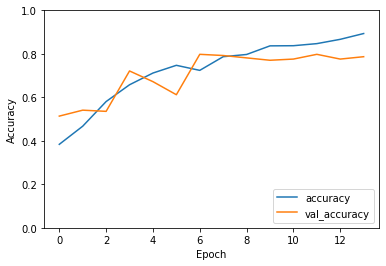

In [7]:
model2.compile(optimizer='adam',
              loss= CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
es =  EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 8, restore_best_weights = True)
history = model2.fit(train_images, epochs=35,validation_split= 0.2, use_multiprocessing = True, callbacks = [es] )
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



In [8]:
model2.evaluate(test_images)

183/183 [==============================] - 3s 14ms/step - loss: 0.5220 - accuracy: 0.7705


[0.52202969789505, 0.7704917788505554]

In [9]:
model2.save('model-files/')

INFO:tensorflow:Assets written to: /Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/assets
